## SimplyUnet Implementation Guidance

This is a step-by-step guidance of how to implement the SimplyUnet model to generate multispectral images from the RGB image. You can either run the manually run the code below or run the script with the single command line.

In [1]:
!pip install -r requirements.txt -q
print("Installation completed.")


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Installation completed.


### ✔ Run with a single command line

In [2]:
# !python train.py --trainpath  '../train/' --valpath '../val/' --name 'example'

#### ✍ Run manually by explicitly listing settings 

In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
from train import train_test_model, VGGFeatureExtractor, gen_img
from utils.data import load_datasets
from model import SimplyUNet
import warnings

# torch.cuda.manual_seed(42) #Fixed seed for the reproductability
warnings.filterwarnings("ignore")

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Feel free to explore other variations of models in the 'unets' directory.
model = SimplyUNet()
vgg_feature_extractor = VGGFeatureExtractor()

# Define paths and hyperparameters
train_path =  '../../train/' 
val_path = '../../val/'

Using device: cuda


In [5]:
learning_rate = 0.02
epochs = 5

In [5]:
model = SimplyUNet()
vgg_feature_extractor = VGGFeatureExtractor()
optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=0.8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
train_test_model(model,train_path,val_path, optimizer, scheduler,device, epochs, 'GSOC','ss26348-queen-mary-university-of-london','sample')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ss26348 (ss26348-queen-mary-university-of-london). Use `wandb login --relogin` to force relogin


Best model saved with Validation LPIPS: 0.0209
Best model saved with Validation LPIPS: 0.0208


#### 👉 Load saved model from best_model directory

In [ ]:
#Choose suitable best model path from the directory
#Example
# best_model_path = 'BEST MODEL PATH'
best_model_path = 'baseUnet_0_0.0004.pth'
model = SimplyUNet()
test_path = '../../val/rgb_images' #Due to lack of datsaet, use val_path temporarily
output_dir = './saved_output'
gen_img(model, best_model_path, test_path, output_dir, device)

### Extract the Hidden Painting

In [6]:
from extract.extract import SiameseNetwork
from extract.train_extract import train
from extract.data import load_datasets

Epoch: 0 (0%)	Loss: -0.241265
Epoch: 0 (14%)	Loss: -0.269228
Epoch: 0 (29%)	Loss: -0.325403
Epoch: 0 (43%)	Loss: -0.272158
Epoch: 0 (57%)	Loss: -0.225760
Epoch: 0 (71%)	Loss: -0.323566
Epoch: 0 (86%)	Loss: -0.296736


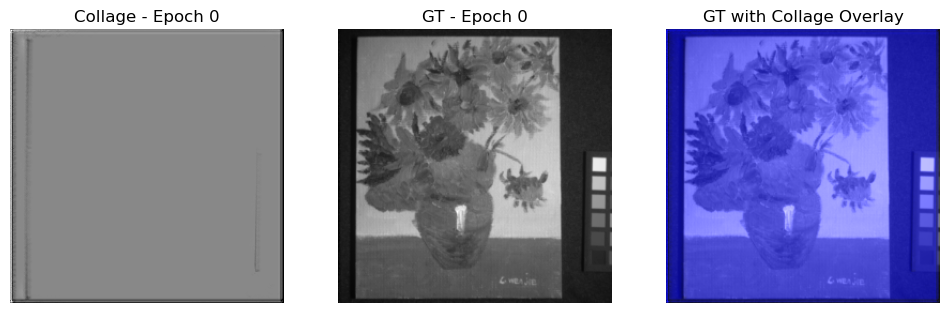


Val: Averaged DSSIM loss: -0.079264

Epoch: 1 (0%)	Loss: -0.238048
Epoch: 1 (14%)	Loss: -0.226284
Epoch: 1 (29%)	Loss: -0.246059
Epoch: 1 (43%)	Loss: -0.218027
Epoch: 1 (57%)	Loss: -0.302964
Epoch: 1 (71%)	Loss: -0.257257
Epoch: 1 (86%)	Loss: -0.272980

Val: Averaged DSSIM loss: -0.074949

Epoch: 2 (0%)	Loss: -0.239090
Epoch: 2 (14%)	Loss: -0.249150
Epoch: 2 (29%)	Loss: -0.270632
Epoch: 2 (43%)	Loss: -0.267506
Epoch: 2 (57%)	Loss: -0.251734
Epoch: 2 (71%)	Loss: -0.245449
Epoch: 2 (86%)	Loss: -0.307091

Val: Averaged DSSIM loss: -0.072286

Epoch: 3 (0%)	Loss: -0.260341
Epoch: 3 (14%)	Loss: -0.267101
Epoch: 3 (29%)	Loss: -0.268072
Epoch: 3 (43%)	Loss: -0.210547
Epoch: 3 (57%)	Loss: -0.245976
Epoch: 3 (71%)	Loss: -0.286826
Epoch: 3 (86%)	Loss: -0.282841

Val: Averaged DSSIM loss: -0.072650

Epoch: 4 (0%)	Loss: -0.226526
Epoch: 4 (14%)	Loss: -0.280130
Epoch: 4 (29%)	Loss: -0.297449
Epoch: 4 (43%)	Loss: -0.269791
Epoch: 4 (57%)	Loss: -0.191742
Epoch: 4 (71%)	Loss: -0.276939
Epoch: 4 (86%)	

In [7]:
model = SiameseNetwork().to(device)
learning_rate = 0.02
optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=0.8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

if device == 'cuda':
    torch.cuda.empty_cache()

trainpath='../../train/'
valpath ='../../val/'
batch = 16
epochs = 5 #Demonstrative purpose

train_loader, val_loader = load_datasets(trainpath, valpath,batch)
train(model, device, train_loader, val_loader, optimizer, epochs)
print('Train/Validation completed')